# Bike sharing is an innovative solution for traffic problems


## Investigation Overview
### In this investigation, I wanted to look at the  dataset :Ford GoBike whisch is the first bike-sharing system introduced in the US West Coast. Its 540 stations and 7,000 bikes sprawl across five cities in San Francisco Bay Area. As an avid GoBike user and a data fanatic, I am excited to explore, using python, the trip data that has been collected in 2019.


## Dataset Overview
### The data consisted of attributes of approximately 183412 members. The attributes included many features but the main features i am interested on are : user gender, user type, the birthday date, the starting time, the ending time  and bike sharing. Also there is no messing values in these features except for the user ages and i replace it with the mean

In [39]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline



In [40]:
# load in the dataset into a pandas dataframe
df=pd.read_csv("Data.csv")

In [41]:
# changing the format of the starting time, ending time, 
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])


In [42]:
# changing the datatypes of some features to be easily used in the analysis
df['start_station_id'] = df['start_station_id'].astype('str')
df['end_station_id'] = df['end_station_id'].astype('str')
df['bike_id'] = df['bike_id'].astype('str')
df['user_type'] = df['user_type'].astype('category')
df['member_gender'] = df['member_gender'].astype('category')

In [43]:
# data wrangling, removing missing data.
df["duration_min"]=df["duration_sec"]/60
df['user_age'] = 2020 - df['member_birth_year']
df["user_age"].fillna(df["user_age"].mean(),inplace=True)

## Distribution of user ages

the age is a mian interest feature the i consider

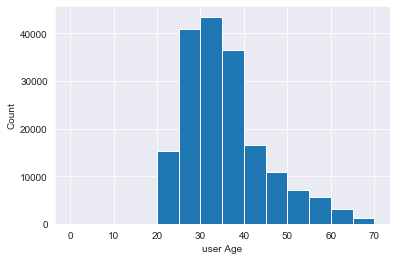

In [59]:
#remove the unlogic ages
df = df.query('user_age <= 70')
bins = np.arange(0, df['user_age'].max()+5, 5)
plt.hist(df['user_age'], bins=bins);
plt.xlabel('user Age');
plt.ylabel('Count');

## Distribution of trip starting hours through the day

may be the starting hours has an effect we will see

Text(0, 0.5, 'Count')

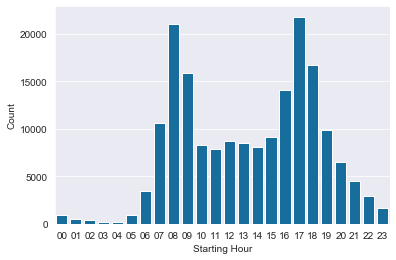

In [45]:
df['starting_hour'] = df["start_time"].dt.strftime('%H')
df['starting_day'] = df["start_time"].dt.strftime('%A')
base_color = sb.color_palette('colorblind')[0]
sb.set_style('darkgrid')

sb.countplot(data=df, x='starting_hour', color=base_color);
plt.xlabel('Starting Hour');
plt.ylabel('Count')

## How long does the average trip take?


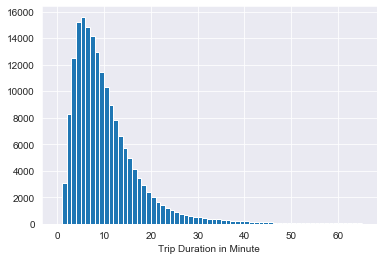

In [46]:
bins = np.arange(0, 66, 1)
ticks = np.arange(0, 66, 10)
plt.hist(data=df, x='duration_min', bins=bins);
plt.xticks(ticks, ticks);
plt.xlabel('Trip Duration in Minute');

## what is the gender of the users

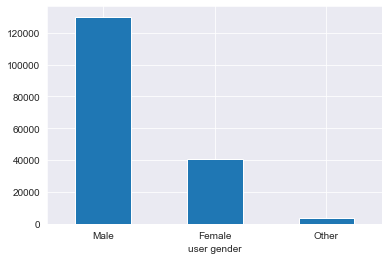

In [47]:
(df.member_gender.value_counts().plot(kind = 'bar',rot = 0))
plt.xlabel('user gender');
plt.show()

## the relation between the gender and the duration trip.
### I found that there is no real difference between the male and female according to the duration trip

In [48]:
df = df.query('duration_min <= 55')

Text(0, 0.5, 'Trip Duration in Minute')

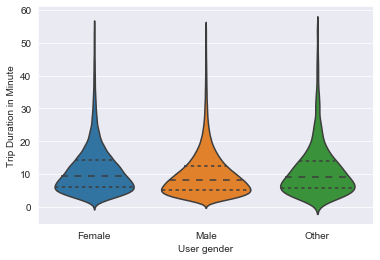

In [49]:
sb.violinplot(x="member_gender",y="duration_min",data=df, inner='quartile')
plt.xlabel('User gender');
plt.ylabel('Trip Duration in Minute')

## does the user ages is related with the trip duration ?

I beleive that the age has an important effect on the trip duration.

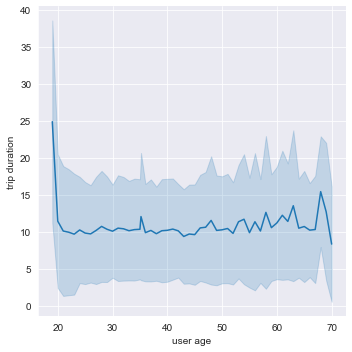

In [50]:
sb.relplot(x="user_age", y="duration_min",kind='line',ci="sd" ,data=df);
plt.xlabel('user age');
plt.ylabel('trip duration');

## How does the user age vary in user gender between customers and subscribers?



Text(0, 0.5, 'Avg. ages')

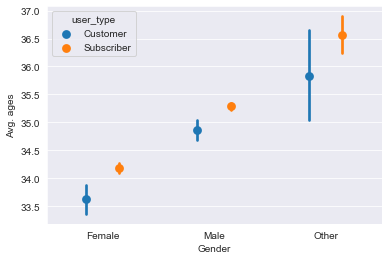

In [51]:
sb.pointplot(data=df, x='member_gender', y='user_age', hue='user_type', dodge=0.3, linestyles="");
plt.xlabel('Gender');
plt.ylabel('Avg. ages')